In [205]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns



from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')


#Loading Data

In [206]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#EDA

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [208]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [209]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

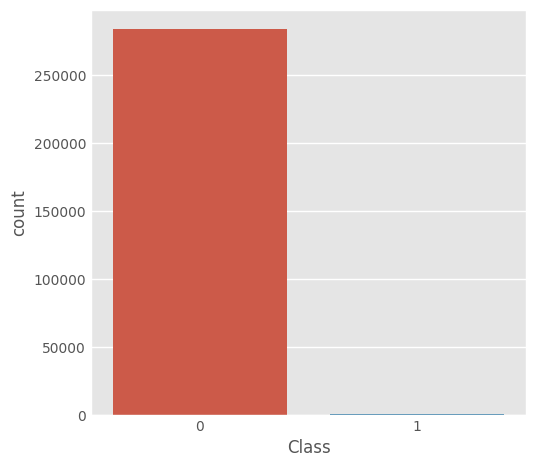

In [210]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Class', data = df)

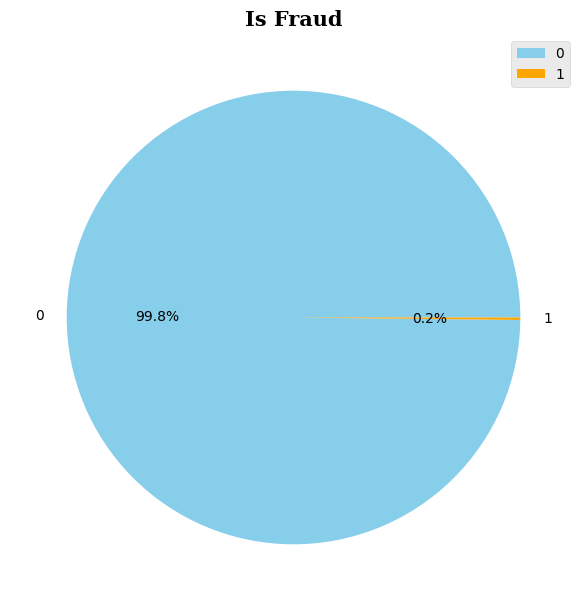

In [211]:
class_counts = df['Class'].value_counts()
colors = ['skyblue', 'orange']
plt.figure(figsize=(7, 7))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=0,colors=colors)
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Is Fraud', size=15,**hfont)
plt.legend()

plt.show()

<Axes: >

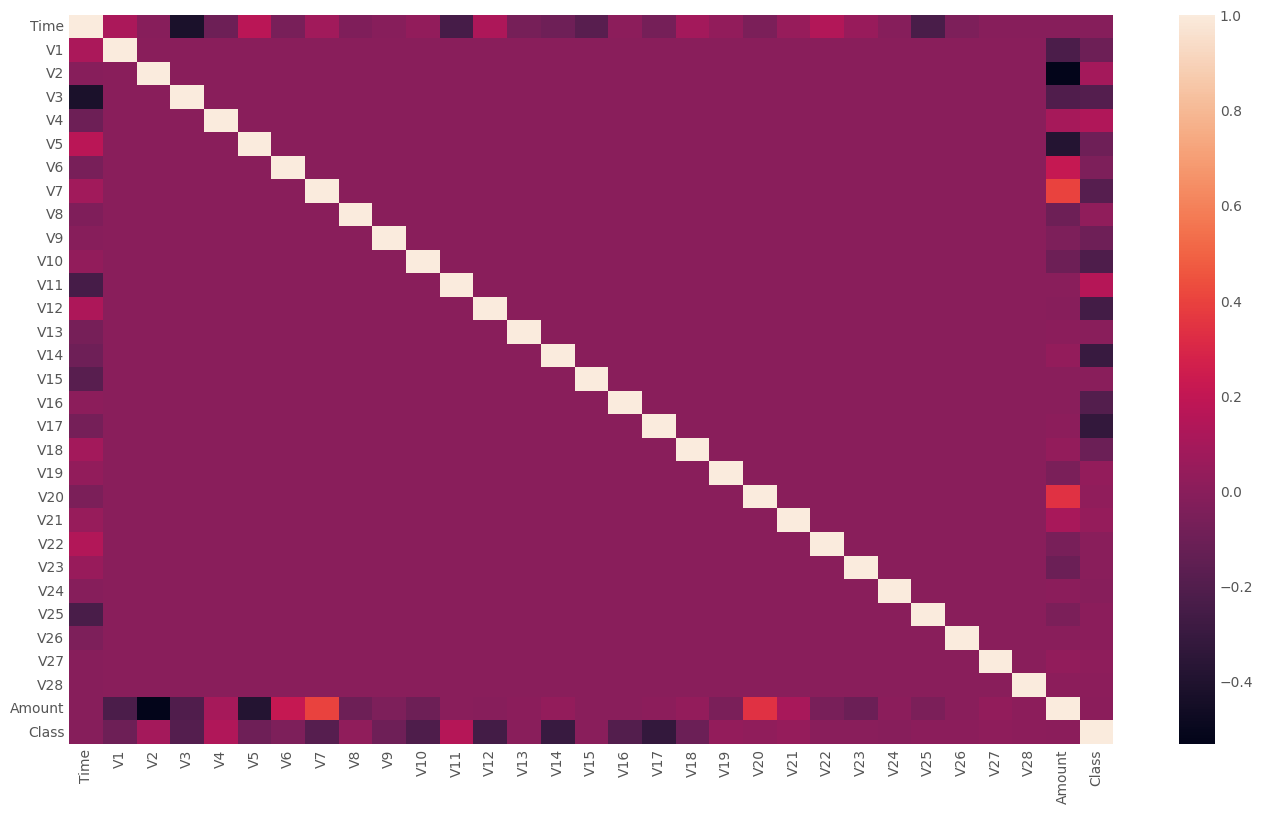

In [212]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(numeric_only = True),annot=False)

In [213]:
X=df.drop(['Class'],axis=1).values
y=df['Class'].values

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Logistic Regression

In [215]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [216]:
logreg_pred = logreg.predict(X_test)
logreg_pred2=logreg.predict(X_train)

train_accuracy:
99.90409810292422
----------------------------------
test_accuracy:
99.91488184536159
----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.82      0.59      0.69       149

    accuracy                           1.00     93987
   macro avg       0.91      0.80      0.84     93987
weighted avg       1.00      1.00      1.00     93987

----------------------------------


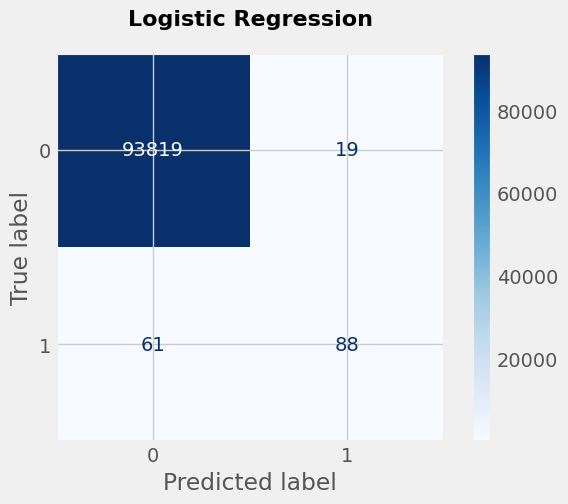

In [217]:
print("train_accuracy:")
print(accuracy_score(logreg_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(logreg_pred,y_test)*100)
print('----------------------------------')

print(classification_report(y_test, logreg_pred))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression',fontsize=16, fontweight='bold',pad=20)
plt.show()


#SVM

In [218]:
svm = LinearSVC(verbose=0)
svm.fit(X_train, y_train)

LinearSVC()

In [219]:
svm_pred = svm.predict(X_test)
svm_pred2 = svm.predict(X_train)

train_accuracy:
99.83073053139084
----------------------------------
test_accuracy:
99.84785129858385
----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.64      0.09      0.16       149

    accuracy                           1.00     93987
   macro avg       0.82      0.55      0.58     93987
weighted avg       1.00      1.00      1.00     93987

----------------------------------


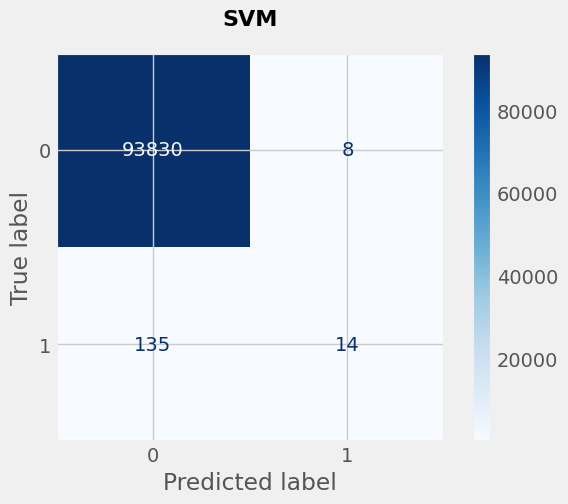

In [220]:
print("train_accuracy:")
print(accuracy_score(svm_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(svm_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, svm_pred))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, svm_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svm.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('SVM',fontsize=16, fontweight='bold',pad=20)
plt.show()

#SGD classifier


In [221]:
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [222]:
clf_pred = clf.predict(X_test)
clf_pred2 = clf.predict(X_train)

train_accuracy:
99.81605701708416
----------------------------------
test_accuracy:
99.83614755232107
----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.00      0.00      0.00       149

    accuracy                           1.00     93987
   macro avg       0.50      0.50      0.50     93987
weighted avg       1.00      1.00      1.00     93987

----------------------------------


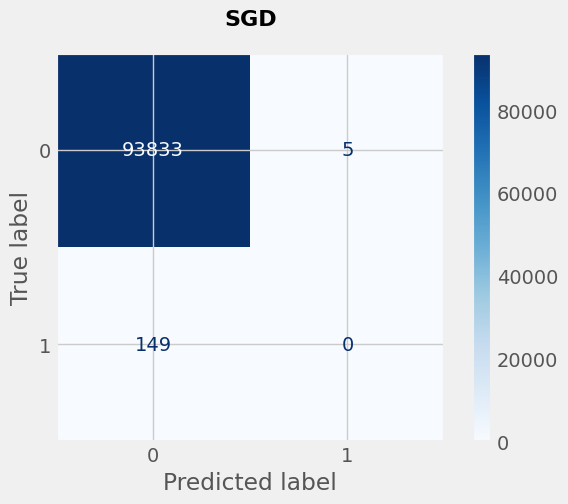

In [223]:
print("train_accuracy:")
print(accuracy_score(clf_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(clf_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, clf_pred))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('SGD',fontsize=16, fontweight='bold',pad=20)
plt.show()

#KNN

In [224]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [225]:
knn_pred = knn.predict(X_test)
knn_pred2 = knn.predict(X_train)

train_accuracy:
99.8343989099675
----------------------------------
test_accuracy:
99.84678732165087
----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       1.00      0.03      0.06       149

    accuracy                           1.00     93987
   macro avg       1.00      0.52      0.53     93987
weighted avg       1.00      1.00      1.00     93987

----------------------------------


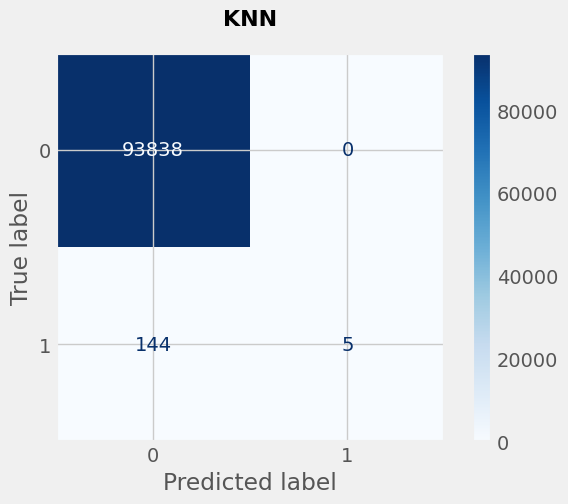

In [226]:
print("train_accuracy:")
print(accuracy_score(knn_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(knn_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, knn_pred))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('KNN',fontsize=16, fontweight='bold',pad=20)
plt.show()

#Naive Byes - BernoulliNB

In [227]:
nb=BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

In [228]:
nb_pred = nb.predict(X_test)
nb_pred2 = nb.predict(X_train)

train_accuracy:
99.91248296824232
----------------------------------
test_accuracy:
99.92020173002649
----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.80      0.66      0.73       149

    accuracy                           1.00     93987
   macro avg       0.90      0.83      0.86     93987
weighted avg       1.00      1.00      1.00     93987

----------------------------------


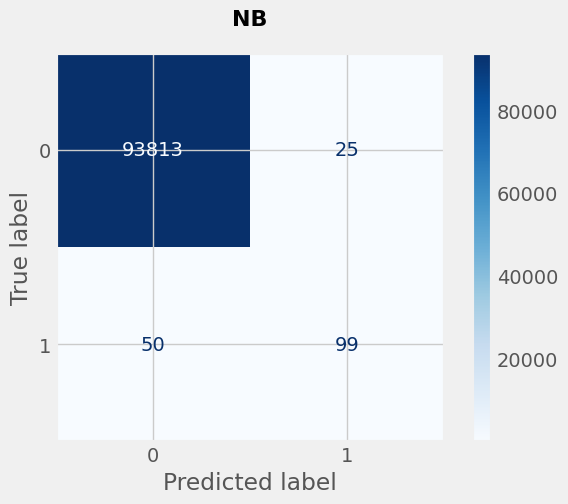

In [229]:
print("train_accuracy:")
print(accuracy_score(nb_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(nb_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, nb_pred))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=nb.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('NB',fontsize=16, fontweight='bold',pad=20)
plt.show()

#Decision Tree

In [230]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [231]:
dt_pred = dt.predict(X_test)
dt_pred2 = dt.predict(X_train)

train_accuracy:
100.0
----------------------------------
test_accuracy:
99.91062593762967
----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.69      0.79      0.74       149

    accuracy                           1.00     93987
   macro avg       0.84      0.90      0.87     93987
weighted avg       1.00      1.00      1.00     93987

----------------------------------


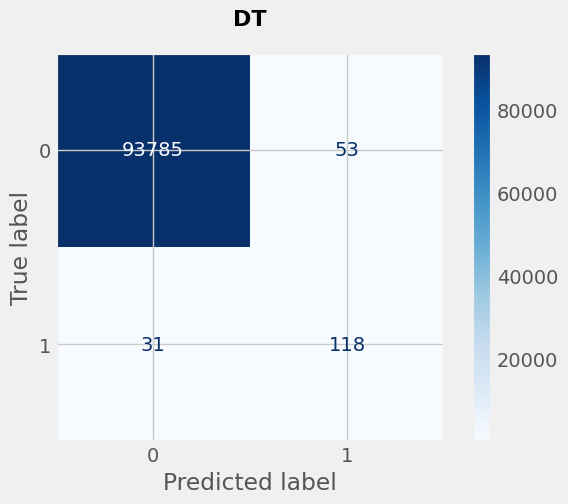

In [232]:
print("train_accuracy:")
print(accuracy_score(dt_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(dt_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, dt_pred))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, dt_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dt.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('DT',fontsize=16, fontweight='bold',pad=20)
plt.show()

#Extra Tree Classifier


In [233]:
et = ExtraTreeClassifier()
et.fit(X_train, y_train)

ExtraTreeClassifier()

In [234]:
et_pred = et.predict(X_test)
et_pred2 = et.predict(X_train)

train_accuracy:
100.0
----------------------------------
test_accuracy:
99.91381786842861
----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.72      0.76      0.74       149

    accuracy                           1.00     93987
   macro avg       0.86      0.88      0.87     93987
weighted avg       1.00      1.00      1.00     93987

----------------------------------


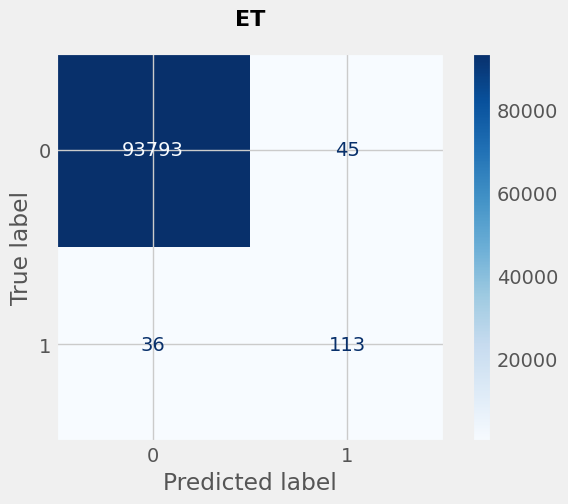

In [235]:
print("train_accuracy:")
print(accuracy_score(et_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(et_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, et_pred))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, et_pred, labels=et.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=et.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('ET',fontsize=16, fontweight='bold',pad=20)
plt.show()

#Random Forest

In [236]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [237]:
rf_pred = rf.predict(X_test)
rf_pred2 = rf.predict(X_train)

train_accuracy:
99.99056702651714
----------------------------------
test_accuracy:
99.95850489961377
----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.95      0.78      0.86       149

    accuracy                           1.00     93987
   macro avg       0.98      0.89      0.93     93987
weighted avg       1.00      1.00      1.00     93987

----------------------------------


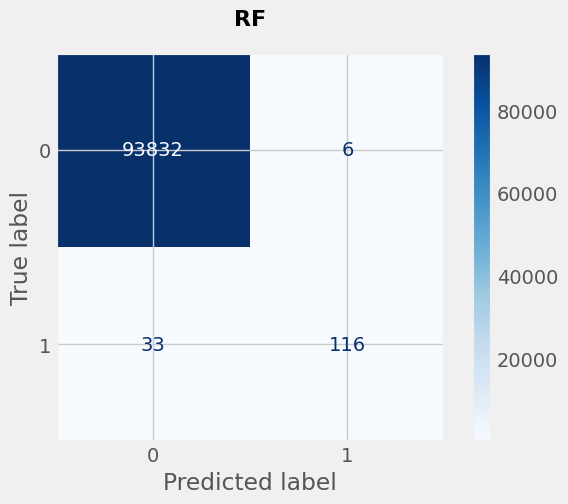

In [238]:
print("train_accuracy:")
print(accuracy_score(rf_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(rf_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, rf_pred))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, rf_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('RF',fontsize=16, fontweight='bold',pad=20)
plt.show()


#EET

In [239]:
eet =ExtraTreesClassifier()
eet.fit(X_train, y_train)

ExtraTreesClassifier()

In [240]:
eet_pred = eet.predict(X_test)
eet_pred2 = eet.predict(X_train)

train_accuracy:
100.0
----------------------------------
test_accuracy:
99.96169683041272
----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.96      0.79      0.87       149

    accuracy                           1.00     93987
   macro avg       0.98      0.90      0.93     93987
weighted avg       1.00      1.00      1.00     93987

----------------------------------


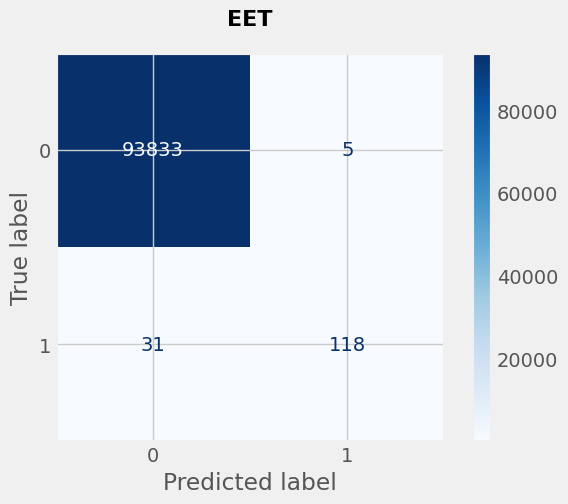

In [241]:
print("train_accuracy:")
print(accuracy_score(eet_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(eet_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, eet_pred))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, eet_pred, labels=eet.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=eet.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('EET',fontsize=16, fontweight='bold',pad=20)
plt.show()

#Mlp classifier

In [242]:
mlp =MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [243]:
mlp_pred = mlp.predict(X_test)
mlp_pred2 = mlp.predict(X_train)

train_accuracy:
99.83230269363798
----------------------------------
test_accuracy:
99.82657175992425
----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.47      0.80      0.59       149

    accuracy                           1.00     93987
   macro avg       0.74      0.90      0.80     93987
weighted avg       1.00      1.00      1.00     93987

----------------------------------


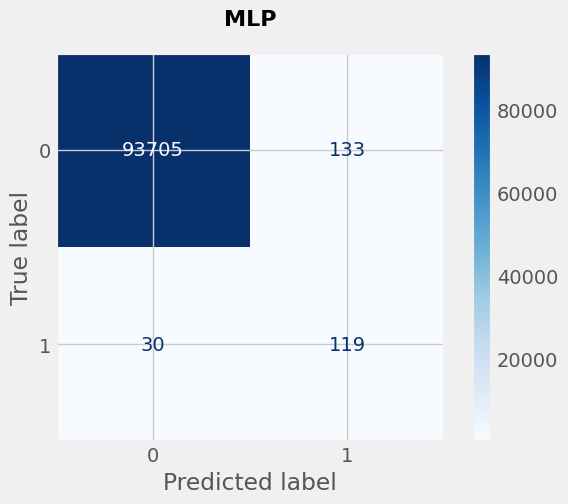

In [244]:
print("train_accuracy:")
print(accuracy_score(mlp_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(mlp_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, mlp_pred))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, mlp_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=mlp.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('MLP',fontsize=16, fontweight='bold',pad=20)
plt.show()

#Stacked based model

In [246]:
from sklearn.ensemble import StackingClassifier

estimator_list = [
    ('DT',dt),
    ('Rf',rf),
    ('EET',eet),

   ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=ExtraTreesClassifier()
)

stack_model.fit(X_train,y_train)
y_pred=stack_model.predict(X_test)
y_pred2=stack_model.predict(X_train)



train_accuracy:
100.0
----------------------------------
test_accuracy:
99.9627608073457
----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.94      0.82      0.87       149

    accuracy                           1.00     93987
   macro avg       0.97      0.91      0.94     93987
weighted avg       1.00      1.00      1.00     93987

----------------------------------


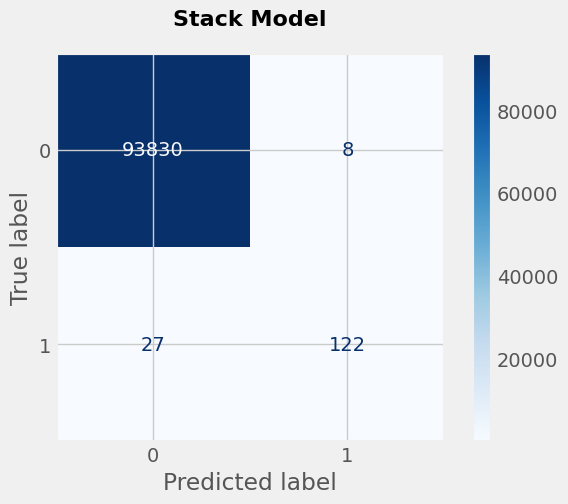

In [247]:
print("train_accuracy:")
print(accuracy_score(y_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(y_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, y_pred))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, y_pred, labels=stack_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=stack_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Stack Model',fontsize=16, fontweight='bold',pad=20)
plt.show()